In [1]:
import itertools

In [2]:
import numpy as np

In [3]:
cache = itertools.product(list(range(256)), repeat=2)

In [4]:
_cache = list()
cache_map = np.zeros((256, 256, 2))

In [5]:
for i in cache:
    _cache.append(i)
    cache_map[i[0]][i[1]] = i

In [6]:
cache = _cache

In [7]:
len(cache), np.array(cache)[range(10)]

(65536, array([[0, 0],
        [0, 1],
        [0, 2],
        [0, 3],
        [0, 4],
        [0, 5],
        [0, 6],
        [0, 7],
        [0, 8],
        [0, 9]]))

In [8]:
#座標位置
cache_map.shape, cache_map[30][range(10)]

((256, 256, 2), array([[30.,  0.],
        [30.,  1.],
        [30.,  2.],
        [30.,  3.],
        [30.,  4.],
        [30.,  5.],
        [30.,  6.],
        [30.,  7.],
        [30.,  8.],
        [30.,  9.]]))

In [9]:
#find 255 2 推算位置
cache[256 * 255 + 2]

(255, 2)

In [10]:
import cv2

In [11]:
image = cv2.imread("test.jpg")

In [12]:
np.array(image).shape

(1080, 1920, 3)

In [13]:
_image = np.array(image).reshape((1920 * 1080 * 3))

In [14]:
from matplotlib import pyplot as plt

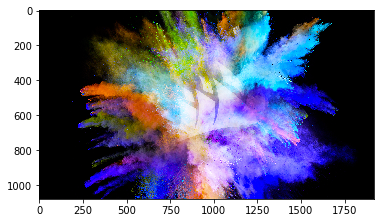

In [15]:
plt.imshow(image)
plt.show()

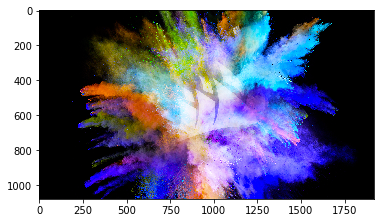

In [16]:
plt.imshow(_image.reshape(1080, 1920, 3))
plt.show()

In [17]:
encode_image = list()

In [18]:
import progressbar

In [19]:
pb = progressbar.ProgressBar()

In [20]:
pb.start()

for i in range(0, len(_image), 2):
    ii = i + 1
    color_1 = _image[i]
    color_2 = _image[ii]
    location = color_1 * 256 + color_2
    
    if not (cache[location] == (color_1, color_2)):
        raise Error
    
    encode_image.append(location)
    
    pb.update(i / len(_image) * 100)

| |                                    #             | 99 Elapsed Time: 0:00:16

In [21]:
6220800 - 2 in range(0, len(_image), 2), 6220800 in range(0, len(_image), 2)

(True, False)

In [22]:
len(encode_image)

3110400

In [23]:
np.save("encode_image", encode_image)

In [24]:
import os

In [25]:
encode_size = os.stat("encode_image.npy").st_size
origin_size = os.stat("test.jpg").st_size

print ("encode image size %d" % encode_size)
print ("origin image size size %d" % origin_size)
print ("save %f " % (encode_size / origin_size * 100))

encode image size 12441728
origin image size size 1942601
save 640.467497 


In [26]:
# decode image

In [27]:
encode_image = np.load("encode_image.npy")

In [28]:
len(encode_image), image.shape, len(_image), len(encode_image) / (1080 * 1920 * 3)

(3110400, (1080, 1920, 3), 6220800, 0.5)

In [29]:
decode_image = list()

In [30]:
for i in encode_image:
    decode_image.extend(cache[i])

In [31]:
len(decode_image)

6220800

In [32]:
decode_image = np.array(decode_image).reshape((1080, 1920, 3))

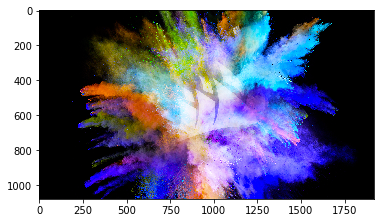

In [33]:
plt.imshow(decode_image)
plt.show()

In [34]:
cv2.imwrite('test_decode.png', decode_image)

True